# TITLE PENDING
### Bachelor's thesis by Lukas Schießer

In [2]:
from rpy2.robjects.packages import importr
base = importr('base')
base._libPaths("C:/Users/lukas/Documents/R/win-library/4.0")
mice = importr('mice')

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

### Preprocessing

In [4]:
pd.options.display.max_columns = None
os.getcwd()
os.chdir("C:/code/Uni/ba")
data = pd.read_excel('blood-exams/covid_study_v2.xlsx')

In [5]:
data.insert(0,'male',(data["GENDER"] == "M").astype('int64'))
data.insert(0,'female',(data["GENDER"] == "F").astype('int64'))
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

female  male   AGE   WBC  Platelets  Neutrophils  Lymphocytes  Monocytes  \
0       0     1  56.0   2.9      128.0          1.9          0.8        0.2   
1       0     1  56.0   3.5      151.0          2.1          0.9        0.4   
2       0     1  72.0   4.6      206.0          NaN          NaN        NaN   
3       0     1  72.0  16.5      316.0         14.0          1.2        0.3   
4       0     1  77.0   4.9      198.0          NaN          NaN        NaN   

   Eosinophils  Basophils    CRP   AST   ALT   ALP   GGT    LDH  SWAB  
0          0.0        0.0   29.0  36.0  18.0  43.0  21.0  257.0     1  
1          0.0        0.0   16.5  25.0  14.0  50.0  17.0  207.0     1  
2          NaN        NaN  193.7  31.0  22.0   NaN   NaN    NaN     1  
3          0.0        0.0  318.7  96.0  33.0  80.0  42.0  651.0     1  
4          NaN        NaN    NaN   NaN   NaN   NaN   NaN    NaN     1

In [6]:
data.describe()

female        male         AGE         WBC   Platelets  \
count  279.000000  279.000000  277.000000  277.000000  277.000000   
mean     0.326165    0.673835   61.776173    8.553069  226.532130   
std      0.469651    0.469651   17.815695    4.855353  101.174178   
min      0.000000    0.000000   18.000000    1.100000   20.000000   
25%      0.000000    0.000000   49.000000    5.100000  163.000000   
50%      0.000000    1.000000   64.000000    7.100000  205.000000   
75%      1.000000    1.000000   76.000000   10.700000  271.000000   
max      1.000000    1.000000   98.000000   29.200000  620.000000   

       Neutrophils  Lymphocytes   Monocytes  Eosinophils   Basophils  \
count   209.000000   208.000000  209.000000   209.000000  208.000000   
mean      6.200478     1.186538    0.605742     0.055024    0.014423   
std       4.172581     0.806442    0.410049     0.132237    0.039116   
min       0.500000     0.200000    0.000000     0.000000    0.000000   
25%       3.500000     0.700000    0.400000     0.000000    0.000000   
50%       5.100000     1.000000    0.500000     0.000000    0.000000   
75%       7.500000     1.400000    0.700000     0.100000    0.000000   
max      26.400000     7.200000    3.200000     1.300000    0.300000   

              CRP         AST         ALT         ALP         GGT  \
count  273.000000  277.000000  266.000000  131.000000  136.000000   
mean    90.889011   54.202166   44.917293   89.893130   82.477941   
std     94.421406   57.612797   45.503232   89.089864  132.702506   
min      0.100000   11.000000    9.000000   34.000000   10.000000   
25%     21.400000   27.000000   21.000000   57.500000   23.750000   
50%     54.200000   36.000000   31.000000   71.000000   41.000000   
75%    129.100000   60.000000   46.000000   90.000000   83.000000   
max    478.000000  550.000000  335.000000  838.000000  839.000000   

               LDH        SWAB  
count   194.000000  279.000000  
mean    380.448454    0.634409  
std     193.983520    0.482461  
min      98.000000    0.000000  
25%     243.250000    0.000000  
50%     328.000000    1.000000  
75%     454.500000    1.000000  
max    1195.000000    1.000000

In [5]:
alpha = 0.05
for col in data.columns[2:-1]:
    # TODO: Perform a Shapiro-Wilk normality test
    stat, p = stats.shapiro(data[col].dropna())

    print('{}: stat={:0.3f}, p={:0.3f}; {}'.format(col, stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

AGE: stat=0.976, p=0.000; Probably not Normal
WBC: stat=0.873, p=0.000; Probably not Normal
Platelets: stat=0.930, p=0.000; Probably not Normal
Neutrophils: stat=0.838, p=0.000; Probably not Normal
Lymphocytes: stat=0.785, p=0.000; Probably not Normal
Monocytes: stat=0.811, p=0.000; Probably not Normal
Eosinophils: stat=0.457, p=0.000; Probably not Normal
Basophils: stat=0.395, p=0.000; Probably not Normal
CRP: stat=0.836, p=0.000; Probably not Normal
AST: stat=0.556, p=0.000; Probably not Normal
ALT: stat=0.629, p=0.000; Probably not Normal
ALP: stat=0.420, p=0.000; Probably not Normal
GGT: stat=0.500, p=0.000; Probably not Normal
LDH: stat=0.877, p=0.000; Probably not Normal


In [6]:
stat, p = stats.shapiro(data.dropna())
print('stat={:0.3f}, p={:0.3f}; {}'.format(stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

stat=0.570, p=0.000; Probably not Normal


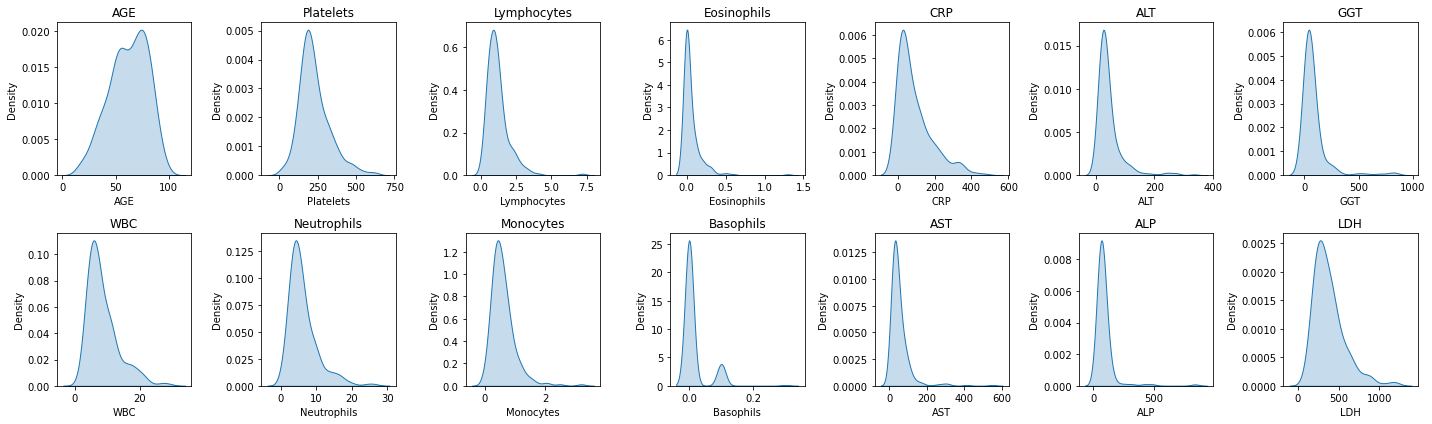

In [7]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data.columns[x]], ax=axes[i,j], fill=True)
    axes[i,j].set_title(data.columns[x])
plt.tight_layout()

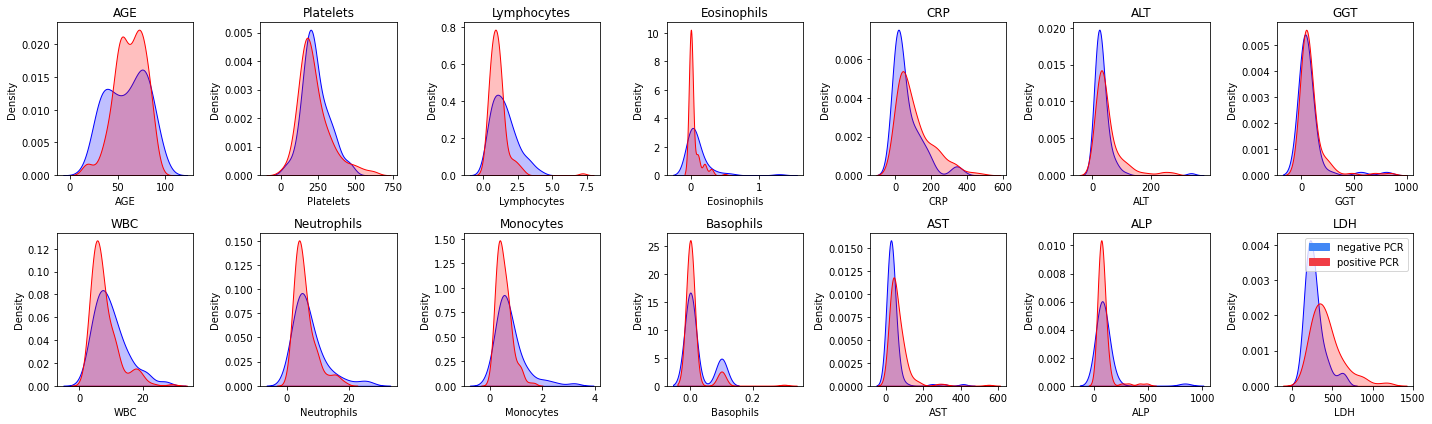

In [8]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='negative PCR')
red_patch = mpatches.Patch(color='#f03c45', label='positive PCR')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data["SWAB"] == 0][data.columns[x]], ax=axes[i,j], color="blue", fill=True)
    sns.kdeplot(data[data["SWAB"] == 1][data.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(data.columns[x])
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()

As you can see, most of the blood values do not follow a standard normal distribution. This can impact the imputation process negatively since most implementations of MICE assume MAR (missing at random) and normality regarding the variables.

In [9]:
data.skew(axis=0, skipna=True)

female         0.745619
male          -0.745619
AGE           -0.364711
WBC            1.465149
Platelets      1.117437
Neutrophils    1.856380
Lymphocytes    2.844919
Monocytes      2.428393
Eosinophils    5.129964
Basophils      3.233118
CRP            1.474657
AST            4.610819
ALT            3.361072
ALP            5.893664
GGT            3.977782
LDH            1.556878
SWAB          -0.561202
dtype: float64

In [11]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(missing_values=np.nan)
knn_data = knn_imp.fit_transform(data)
knn_data = pd.DataFrame(knn_data, columns=data.columns)
knn_data.describe()

female        male         AGE         WBC   Platelets  \
count  279.000000  279.000000  279.000000  279.000000  279.000000   
mean     0.326165    0.673835   61.819355    8.559355  226.658065   
std      0.469651    0.469651   17.758923    4.840303  100.878446   
min      0.000000    0.000000   18.000000    1.100000   20.000000   
25%      0.000000    0.000000   49.000000    5.100000  163.500000   
50%      0.000000    1.000000   64.000000    7.200000  205.000000   
75%      1.000000    1.000000   76.000000   10.750000  271.500000   
max      1.000000    1.000000   98.000000   29.200000  620.000000   

       Neutrophils  Lymphocytes   Monocytes  Eosinophils   Basophils  \
count   279.000000   279.000000  279.000000   279.000000  279.000000   
mean      6.137061     1.181720    0.612760     0.057634    0.013477   
std       3.776312     0.740352    0.368705     0.120067    0.034917   
min       0.500000     0.200000    0.000000     0.000000    0.000000   
25%       3.740000     0.700000    0.400000     0.000000    0.000000   
50%       5.280000     1.000000    0.560000     0.000000    0.000000   
75%       7.410000     1.400000    0.790000     0.100000    0.000000   
max      26.400000     7.200000    3.200000     1.300000    0.300000   

              CRP         AST         ALT         ALP         GGT  \
count  279.000000  279.000000  279.000000  279.000000  279.000000   
mean    90.581434   54.098925   45.101792   83.352688   72.996416   
std     93.596677   57.418288   44.567885   64.475594  101.886832   
min      0.100000   11.000000    9.000000   34.000000   10.000000   
25%     21.800000   27.000000   22.000000   59.900000   27.100000   
50%     54.500000   37.000000   32.000000   72.000000   42.400000   
75%    129.100000   60.000000   47.000000   86.800000   82.800000   
max    478.000000  550.000000  335.000000  838.000000  839.000000   

               LDH        SWAB  
count   279.000000  279.000000  
mean    371.797849    0.634409  
std     174.703029    0.482461  
min      98.000000    0.000000  
25%     252.300000    0.000000  
50%     324.000000    1.000000  
75%     441.000000    1.000000  
max    1195.000000    1.000000

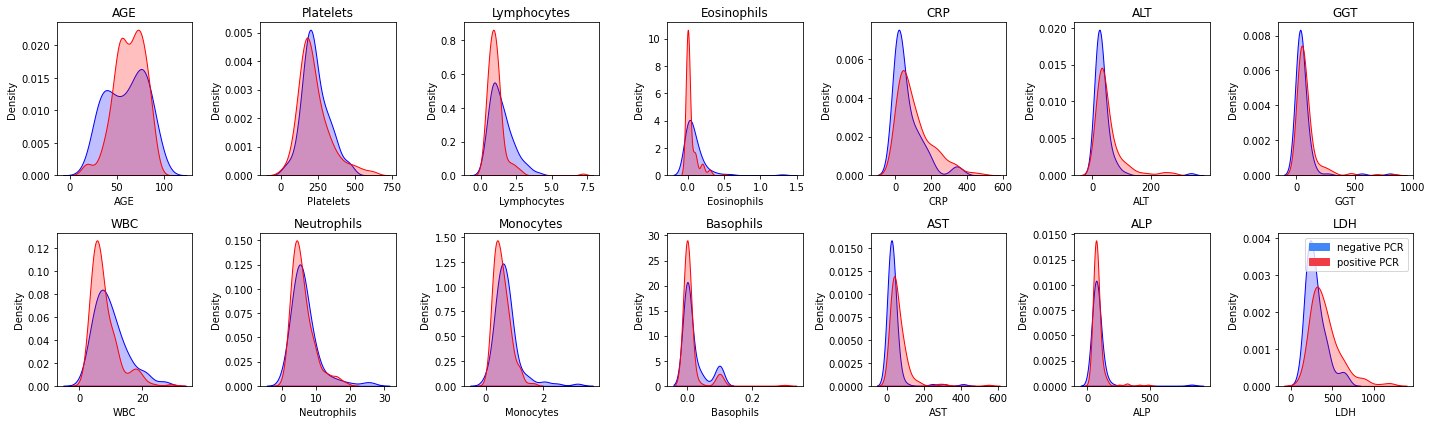

In [12]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='negative PCR')
red_patch = mpatches.Patch(color='#f03c45', label='positive PCR')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(knn_data[knn_data["SWAB"] == 0][knn_data.columns[x]], ax=axes[i,j], color="blue",fill=True)
    sns.kdeplot(knn_data[knn_data["SWAB"] == 1][knn_data.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(knn_data.columns[x])
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()

In [18]:
data.isnull().any(axis=1).sum() / data.shape[0]

0.7025089605734767

### Model preparation

In [14]:
# import all necessary tools
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
# imported confusion_matrix because it return TP, TN, FP, FN which are required to compute sensitivity and positive predictive value

In [8]:
X, y = data[data.columns[:-1]], data["SWAB"]

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
with localconverter(ro.default_converter + pandas2ri.converter):
    dm = mice.mice(X, m=5, maxit=20, seed=500)
    completed = mice.complete_mids(dm,1)

In [ ]:
# prepare 5-fold nested cross validation by defining outer loop of nested cv
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# question 1: paper states that missing data imputation done during nested cross validation,
# but Imputer has to be trained. Train it on whole dataset and then use it for every nested cross-validation subset or train it on subsets?
# start for loop by invoking cv_outer.split(X, y) to get indices for subsetting training and test data
# fit MICE only on X_train data, but apply it to both. This way both training and test data will be sharing a common impute procedure, 
# hence whatever feature selection method is chosen will be actually applicable to both datasets. [2]
# mice() apparently does not support fitting the mice model to the training set and then applying to both the training and test set
# either train on whole dataset and then split every cross-validation fold or fit two models for the training and test set respectively
# the second approach could avoid data leakage.
for train_index, test_index in cv_outer.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    # do imputation here?
    # define inner loop of nested cross validation
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # instantiate model for hyperparameter search by means of GridSearch
    rf = RandomForestClassifier(random_state=1)
    # define the search space over which GridSearch should; currently just sample values, need to be defined later
    rf_space = {
        'n_estiamtors': [10, 100, 500],
        'max_features': [2, 4, 6]
    }
    # define GridSearch for nested cv
    rf_search = GridSearchCV(rf, rf_space, scoring='accuracy', cv=cv_inner, refit=True)
    rf_result = rf_search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    rf_best_model = rf_result.best_estimator_
    rf_yhat = rf_best_model.predict(X_test)
    lr_space = {
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l1', 'l2']
    }
    lr = LogisticRegression(random_state=1)
    lr_search = GridSearchCV(lr, lr_space, scoring='accuracy', cv=cv_inner, refit=True)
    lr_result = lr_search.fit(X_train, y_train)
    lr_best_model =  lr_result.best_estimator_
    lr_yhat = lr_best_model.predict(X_test)
    # evaluate the model by means of accuracy, balanced accuracy, positive predictive value (PPV), sensitivity and AUC

[[1]](https://stats.stackexchange.com/questions/437487/cross-validation-and-multiple-imputation-for-missing-data) seems to indicate that training should happen on subset

[[2]](https://stackoverflow.com/questions/63175087/missing-values-imputation-with-five-fold-cross-validation-using-python)